In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

import seaborn as sns

In [2]:
data = pd.read_excel('./scrapped/Final data for clustering.xlsx')
data.head()

,State,Population,Male-female ratio,# kids per person,percent infant mortality,Migrant population aged 5 and over,Specific rate of economic participation,# cities
0,01 Aguascalientes,1425607,95.576905,2.109342,6.155518,80357,63.304197,2022
1,02 Baja California,3769020,101.721123,1.903566,6.364128,269985,65.509672,5545
2,03 Baja California Sur,798447,103.390750,1.900622,5.947572,85835,67.045768,2543
3,04 Campeche,928363,96.927394,2.095864,6.509272,37557,63.341754,2762
4,07 Chiapas,5543828,95.350968,2.342042,7.455336,149762,61.188540,21157


In [3]:
features = data.columns[1:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

In [4]:
kmeans_kwargs = {"init": "random",
"n_init": 10,
"max_iter": 300,
 "random_state": 42,}
 # A list holds the SSE values for each k
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

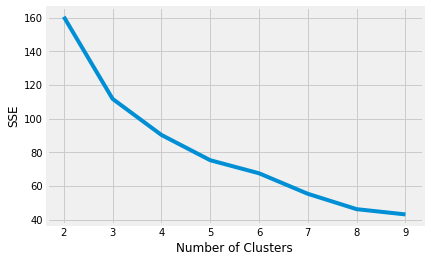

In [5]:
#%matplotlib inline
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [6]:
kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [7]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [8]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
kmeans_silhouette

0.29

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
# Repeat, but now using k-means
kmeans_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', KMeans(n_clusters=2))
])

kmeans_pipe.fit(X)
labels = kmeans_pipe.predict(data[features])

kmeans_sil_avg = silhouette_score(data[features], labels)
print('The silhouette score for K-means is %.3f' % kmeans_sil_avg)

# We can plot a silhouette plot for k-means using yellowbricks
visualizer = SilhouetteVisualizer(kmeans_pipe[1]) # Get the kmeans model
visualizer.fit(kmeans_pipe[0].transform(X)) # Pass the scaled data
visualizer.show() # show the plot

In [30]:
pca = PCA(n_components = 2)
pca.fit(scaled_features)

PCA(n_components=2)

In [31]:
PCA_df = pd.DataFrame(pca.transform(scaled_features))
PCA_df.columns = ['Component 1','Component 2']
PCA_df['cluster'] = kmeans.labels_
PCA_df['State'] = data['State']

c:\Users\u0132030\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


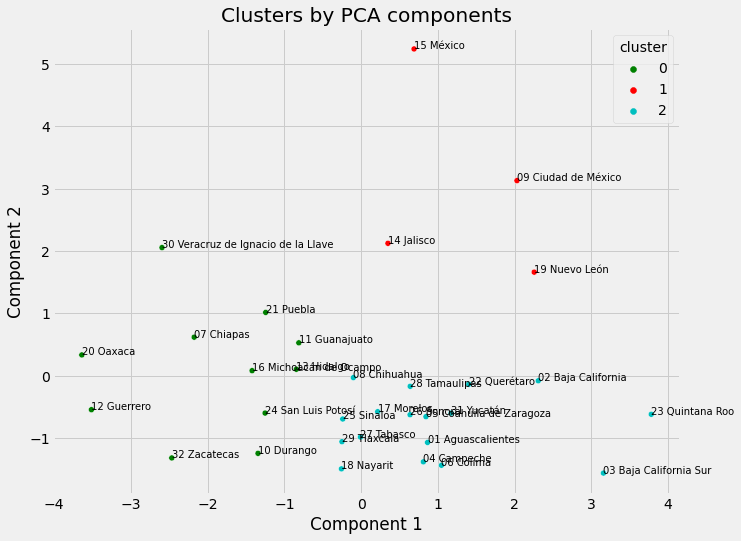

In [32]:
x_axis = PCA_df['Component 1']
y_axis = PCA_df['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = PCA_df['cluster'], palette = ['g','r','c'])
for i in range(PCA_df.shape[0]):
 plt.text(x=PCA_df['Component 1'][i],y=PCA_df['Component 2'][i],s=PCA_df['State'][i], 
          fontdict=dict(color='black',size=10))
plt.title('Clusters by PCA components')
plt.show()



In [39]:
kmeans.cluster_centers_


array([[ 0.13583633, -0.7399863 ,  0.99144142,  0.98939151, -0.18089376,
        -0.81627311,  0.74472591],
       [ 1.9048573 , -0.17194646, -1.13431568, -0.76470189,  2.36663069,
         0.3707134 , -0.15642111],
       [-0.53609581,  0.51927265, -0.37462311, -0.46026465, -0.43980538,
         0.44095003, -0.4450765 ]])

In [48]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, scaled_features)

In [49]:
closest

array([15, 13,  3], dtype=int64)

In [50]:
data

,State,Population,Male-female ratio,# kids per person,percent infant mortality,Migrant population aged 5 and over,Specific rate of economic participation,# cities
0,01 Aguascalientes,1425607,95.576905,2.109342,6.155518,80357,63.304197,2022
1,02 Baja California,3769020,101.721123,1.903566,6.364128,269985,65.509672,5545
2,03 Baja California Sur,798447,103.390750,1.900622,5.947572,85835,67.045768,2543
3,04 Campeche,928363,96.927394,2.095864,6.509272,37557,63.341754,2762
4,07 Chiapas,5543828,95.350968,2.342042,7.455336,149762,61.188540,21157
5,08 Chihuahua,3741869,98.187280,2.043629,7.271757,160641,62.272983,12186
6,05 Coahuila de Zaragoza,3146771,98.772473,2.061506,5.903358,131077,59.986685,4034
7,06 Colima,731391,97.263256,2.062523,7.119897,55086,65.266168,1226
8,09 Ciudad de México,9209944,91.673495,1.645217,6.302078,643380,64.430013,634
9,10 Durango,1832650,97.529813,2.315423,7.386218,67395,57.783127,5890
